In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.multivariate_normal?

In [3]:
mean_1 = np.array([5, 2])
cov_1 = np.array([[1, 6], 
                  [3, 1]])

mean_2 = np.array([-5, 10])
cov_2 = np.array([[1, 5],
                  [7, 1]])

In [4]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, 100)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, 100)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_4628\1990955332.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, 100)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_4628\1990955332.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, 100)


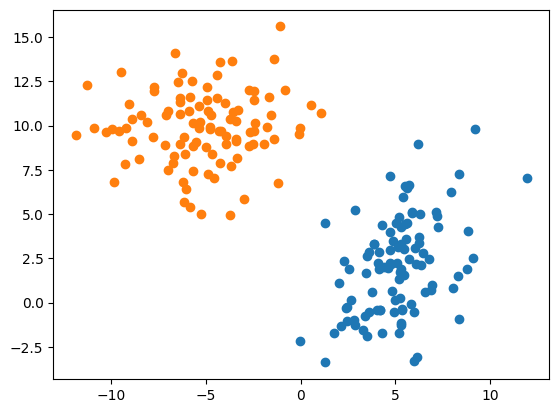

In [5]:
plt.scatter(dist_1[:, 0], dist_1[:, 1])
plt.scatter(dist_2[:, 0], dist_2[:, 1])

In [6]:
print(dist_1.shape, dist_2.shape)

(100, 2) (100, 2)


In [7]:
# u = np.mean(dist_1, axis = 0)
# std = np.std(dist_1, axis = 0)

# dist_1 = (dist_1 - u)/std

# u = np.mean(dist_2, axis = 0)
# std = np.std(dist_2, axis = 0)

# dist_2 = (dist_2 - u)/std

In [8]:
dataset = np.zeros((200, 3))

In [9]:
dataset[:100, :2] = dist_1
dataset[100:, :2] = dist_2

dataset[100:, -1] = 1

In [10]:
dataset[:10]

array([[ 5.84223207, -0.06827868,  0.        ],
       [ 5.3041332 ,  4.24696091,  0.        ],
       [ 2.88989678,  5.25056689,  0.        ],
       [ 2.79200721, -0.97225272,  0.        ],
       [ 4.73003462,  7.15594809,  0.        ],
       [ 6.2278354 ,  3.34319961,  0.        ],
       [ 1.26134211, -3.38490695,  0.        ],
       [ 4.02055978, -0.42097629,  0.        ],
       [ 5.72766791,  2.47623685,  0.        ],
       [ 4.18357515, -0.44339733,  0.        ]])

In [11]:
np.random.shuffle(dataset)

In [12]:
dataset[-10:]

array([[-0.84369938, 12.02129564,  1.        ],
       [-6.20105734,  6.80821759,  1.        ],
       [ 5.24659447,  0.25636206,  0.        ],
       [ 7.12600128,  5.10103065,  0.        ],
       [-5.33286823,  9.84483974,  1.        ],
       [-6.3521553 , 11.57469382,  1.        ],
       [-8.88034199, 10.38739841,  1.        ],
       [ 4.8828186 ,  3.47517892,  0.        ],
       [-1.41363359, 13.77368401,  1.        ],
       [-3.62241305, 13.67910447,  1.        ]])

In [13]:
X_train = dataset[:160, :-1]
Y_train = dataset[:160, -1]

X_test = dataset[160:, :-1]
Y_test = dataset[160:, -1]

In [14]:
Y_test

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1.])

In [15]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [16]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [17]:
def cost(X, Y, theta):
    hx = hypothesis(X, theta)
    loss = np.mean(Y*np.log(hx) + (1-Y)*np.log(1-hx))
    return -1*loss

In [18]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    grad = np.dot(X.T, (Y - y_p))
    return grad/X.shape[0]

In [19]:
def gradient_descent(X, Y):
    theta = np.zeros((X.shape[1], ))
    
    max_epochs = 1000
    epoch_loss = []
    lr = 0.03
    
    for i in range(max_epochs):
        grad = gradient(X, Y, theta)
        
        loss = cost(X, Y, theta)
        epoch_loss.append(loss)
        
        theta = theta + lr*grad
        
    return theta, epoch_loss

In [20]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))

ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))

In [21]:
theta, cost = gradient_descent(X_train, Y_train)

In [22]:
cost

[0.6931471805599453,
 0.4404885759256896,
 0.3434704057592045,
 0.2882655174199315,
 0.25092150690422804,
 0.22340992782236863,
 0.20208788958530377,
 0.18498777988060275,
 0.17092515307150544,
 0.15913321993606896,
 0.14908905320795626,
 0.14042174885960734,
 0.13285997547218975,
 0.12620019443761737,
 0.12028648986830151,
 0.11499727848900816,
 0.11023627756688019,
 0.105926204413799,
 0.1020042819453171,
 0.09841896961719748,
 0.09512754460182951,
 0.09209428463333261,
 0.08928908411552827,
 0.08668638713255872,
 0.08426435553796642,
 0.08200421366650022,
 0.07988972730463391,
 0.07790678581397689,
 0.07604306429298142,
 0.07428774841020987,
 0.07263130872734364,
 0.07106531441154633,
 0.06958227852949679,
 0.06817552883790123,
 0.06683909929116708,
 0.06556763848536862,
 0.06435633202712758,
 0.06320083641352156,
 0.062097222476351875,
 0.06104192681189147,
 0.06003170990858255,
 0.05906361991733176,
 0.05813496119512311,
 0.05724326690260262,
 0.05638627505771458,
 0.0555619075462

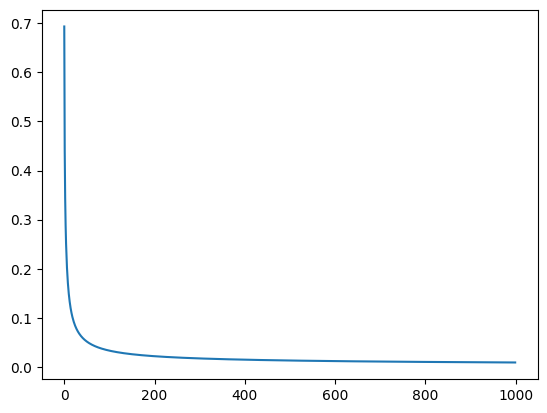

In [23]:
plt.plot(cost)

In [24]:
theta

array([-0.33125413, -1.44420974,  0.38538505])

In [25]:
x1 = np.arange(-10, 10)

In [26]:
sig = sigmoid(x1)

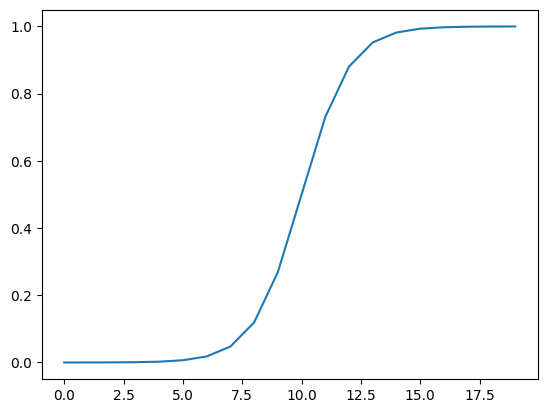

In [27]:
plt.plot(sig)

In [28]:
x2 = -(theta[0] + theta[1]*x1)/theta[2]

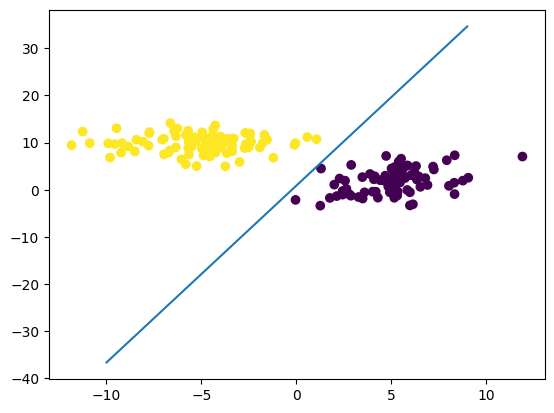

In [29]:
plt.scatter(X_train[:, 1], X_train[:, 2], c = Y_train)
plt.plot(x1, x2)

In [30]:
def accuracy(X_test, Y_test, theta):
    preds = hypothesis(X_test, theta)
    count = 0
    y_p = []
    for i in range(len(preds)):
        if preds[i] > 0.5:
            y_p.append(1)
        else:
            y_p.append(0)
    for i in range(len(preds)):
        if y_p[i] == Y_test[i]:
            count += 1
        else:
            pass
    return count/len(y_p)

In [31]:
acc = accuracy(X_test, Y_test, theta)

In [32]:
print(acc)

1.0
